   # Pokémon : Let's find the dream team!

#### Loading the necessary libraries/code

In [2]:
from IPython.display import Image
from IPython.display import YouTubeVideo
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
import pandas as pd

from vega_datasets import data


pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

#### Loading the dataset (aka. the Pokédex)

In [3]:
pokedex = pd.read_csv('pokemon.csv')
pokedex.head()

abilities  against_bug  against_dark  against_dragon  \
0  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
1  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
2  ['Overgrow', 'Chlorophyll']          1.0           1.0             1.0   
3     ['Blaze', 'Solar Power']          0.5           1.0             1.0   
4     ['Blaze', 'Solar Power']          0.5           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
0               0.5            0.5            0.5           2.0   
1               0.5            0.5            0.5           2.0   
2               0.5            0.5            0.5           2.0   
3               1.0            0.5            1.0           0.5   
4               1.0            0.5            1.0           0.5   

   against_flying  against_ghost  against_grass  against_ground  against_ice  \
0             2.0            1.0           0.25             1.0          2.0   
1             2.0            1.0           0.25             1.0          2.0   
2             2.0            1.0           0.25             1.0          2.0   
3             1.0            1.0           0.50             2.0          0.5   
4             1.0            1.0           0.50             2.0          0.5   

   against_normal  against_poison  against_psychic  against_rock  \
0             1.0             1.0              2.0           1.0   
1             1.0             1.0              2.0           1.0   
2             1.0             1.0              2.0           1.0   
3             1.0             1.0              1.0           2.0   
4             1.0             1.0              1.0           2.0   

   against_steel  against_water  attack  base_egg_steps  base_happiness  \
0            1.0            0.5      49            5120              70   
1            1.0            0.5      62            5120              70   
2            1.0            0.5     100            5120              70   
3            0.5            2.0      52            5120              70   
4            0.5            2.0      64            5120              70   

   base_total  capture_rate   classfication  defense  experience_growth  \
0         318            45    Seed Pokémon       49            1059860   
1         405            45    Seed Pokémon       63            1059860   
2         625            45    Seed Pokémon      123            1059860   
3         309            45  Lizard Pokémon       43            1059860   
4         405            45   Flame Pokémon       58            1059860   

   height_m  hp     japanese_name        name  percentage_male  \
0       0.7  45  Fushigidaneフシギダネ   Bulbasaur             88.1   
1       1.0  60   Fushigisouフシギソウ     Ivysaur             88.1   
2       2.0  80  Fushigibanaフシギバナ    Venusaur             88.1   
3       0.6  39      Hitokageヒトカゲ  Charmander             88.1   
4       1.1  58       Lizardoリザード  Charmeleon             88.1   

   pokedex_number  sp_attack  sp_defense  speed  type1   type2  weight_kg  \
0               1         65          65     45  grass  poison        6.9   
1               2         80          80     60  grass  poison       13.0   
2               3        122         120     80  grass  poison      100.0   
3               4         60          50     65   fire     NaN        8.5   
4               5         80          65     80   fire     NaN       19.0   

   generation  is_legendary  
0           1             0  
1           1             0  
2           1             0  
3           1             0  
4           1             0

As we can see, we've got 801 instances/pokemon with about 41 attributes for each pokemon.

In [4]:
pokedex.shape

(801, 41)

In [5]:
pokedex.name

0         Bulbasaur
1           Ivysaur
2          Venusaur
3        Charmander
4        Charmeleon
5         Charizard
6          Squirtle
7         Wartortle
8         Blastoise
9          Caterpie
10          Metapod
11       Butterfree
12           Weedle
13           Kakuna
14         Beedrill
15           Pidgey
16        Pidgeotto
17          Pidgeot
18          Rattata
19         Raticate
20          Spearow
21           Fearow
22            Ekans
23            Arbok
24          Pikachu
25           Raichu
26        Sandshrew
27        Sandslash
28         Nidoran♀
29         Nidorina
30        Nidoqueen
31         Nidoran♂
32         Nidorino
33         Nidoking
34         Clefairy
35         Clefable
36           Vulpix
37        Ninetales
38       Jigglypuff
39       Wigglytuff
40            Zubat
41           Golbat
42           Oddish
43            Gloom
44        Vileplume
45            Paras
46         Parasect
47          Venonat
48         Venomoth
49          Diglett


In [6]:
pokedex.columns = pokedex.columns.str.lower()

In [7]:
pokedex["id"] = pokedex.index + 1

In [8]:
pokedex

abilities  against_bug  \
0                          ['Overgrow', 'Chlorophyll']         1.00   
1                          ['Overgrow', 'Chlorophyll']         1.00   
2                          ['Overgrow', 'Chlorophyll']         1.00   
3                             ['Blaze', 'Solar Power']         0.50   
4                             ['Blaze', 'Solar Power']         0.50   
5                             ['Blaze', 'Solar Power']         0.25   
6                             ['Torrent', 'Rain Dish']         1.00   
7                             ['Torrent', 'Rain Dish']         1.00   
8                             ['Torrent', 'Rain Dish']         1.00   
9                          ['Shield Dust', 'Run Away']         1.00   
10                                       ['Shed Skin']         1.00   
11                     ['Compoundeyes', 'Tinted Lens']         0.50   
12                         ['Shield Dust', 'Run Away']         0.50   
13                                       ['Shed Skin']         0.50   
14                                 ['Swarm', 'Sniper']         0.50   
15           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
16           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
17           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
18   ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...         1.00   
19   ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...         1.00   
20                              ['Keen Eye', 'Sniper']         0.50   
21                              ['Keen Eye', 'Sniper']         0.50   
22              ['Intimidate', 'Shed Skin', 'Unnerve']         0.50   
23              ['Intimidate', 'Shed Skin', 'Unnerve']         0.50   
24                          ['Static', 'Lightningrod']         1.00   
25          ['Static', 'Lightningrod', 'Surge Surfer']         1.00   
26   ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...         1.00   
27   ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...         1.00   
28               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
29               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
30          ['Poison Point', 'Rivalry', 'Sheer Force']         0.50   
31               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
32               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
33          ['Poison Point', 'Rivalry', 'Sheer Force']         0.50   
34       ['Cute Charm', 'Magic Guard', 'Friend Guard']         0.50   
35            ['Cute Charm', 'Magic Guard', 'Unaware']         0.50   
36   ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...         0.50   
37   ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...         0.50   
38       ['Cute Charm', 'Competitive', 'Friend Guard']         0.50   
39              ['Cute Charm', 'Competitive', 'Frisk']         0.50   
40                      ['Inner Focus', 'Infiltrator']         0.25   
41                      ['Inner Focus', 'Infiltrator']         0.25   
42                         ['Chlorophyll', 'Run Away']         1.00   
43                           ['Chlorophyll', 'Stench']         1.00   
44                     ['Chlorophyll', 'Effect Spore']         1.00   
45                ['Effect Spore', 'Dry Skin', 'Damp']         2.00   
46                ['Effect Spore', 'Dry Skin', 'Damp']         2.00   
47         ['Compoundeyes', 'Tinted Lens', 'Run Away']         0.50   
48      ['Shield Dust', 'Tinted Lens', 'Wonder Skin ']         0.50   
49   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...         1.00   
50   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...         1.00   
51   ['Pickup', 'Technician', 'Unnerve', 'Pickup', ...         1.00   
52   ['Limber', 'Technician', 'Unnerve', 'Fur Coat'...         1.00   
53                ['Damp', 'Cloud Nine', 'Swift Swim']         1.00   
54                ['Damp', 'Cloud Nine', 'Swift Swim']         1.00   
55          ['Vital Spirit', 'Anger Point', 'Defiant']         0.50  

## Cleaning the data

In [9]:
pokedex.drop_duplicates('name', keep='first', inplace=True)

In [10]:
pokedex.shape

(801, 42)

#### We have attributes Type 1 and Type 2. All Pokémon don't necessarily have 2 types. For eg :  Charizard can be of Fire and Flying type, however Squirtle is of Water type. The data for Type 2 for squirtle is NaN. So this needs to be set to None. 

In [11]:
pokedex.loc[pokedex['name'] == 'Squirtle']

abilities  against_bug  against_dark  against_dragon  \
6  ['Torrent', 'Rain Dish']          1.0           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
6               2.0            1.0            1.0           0.5   

   against_flying  against_ghost  against_grass  against_ground  against_ice  \
6             1.0            1.0            2.0             1.0          0.5   

   against_normal  against_poison  against_psychic  against_rock  \
6             1.0             1.0              1.0           1.0   

   against_steel  against_water  attack  base_egg_steps  base_happiness  \
6            0.5            0.5      48            5120              70   

   base_total  capture_rate        classfication  defense  experience_growth  \
6         314            45  Tiny Turtle Pokémon       65            1059860   

   height_m  hp japanese_name      name  percentage_male  pokedex_number  \
6       0.5  44  Zenigameゼニガメ  Squirtle             88.1               7   

   sp_attack  sp_defense  speed  type1 type2  weight_kg  generation  \
6         50          64     43  water   NaN        9.0           1   

   is_legendary  id  
6             0   7

In [12]:
pokedex['type2'].fillna(value='None', inplace=True)

In [13]:
pokedex.loc[pokedex['name'] == 'Squirtle']

abilities  against_bug  against_dark  against_dragon  \
6  ['Torrent', 'Rain Dish']          1.0           1.0             1.0   

   against_electric  against_fairy  against_fight  against_fire  \
6               2.0            1.0            1.0           0.5   

   against_flying  against_ghost  against_grass  against_ground  against_ice  \
6             1.0            1.0            2.0             1.0          0.5   

   against_normal  against_poison  against_psychic  against_rock  \
6             1.0             1.0              1.0           1.0   

   against_steel  against_water  attack  base_egg_steps  base_happiness  \
6            0.5            0.5      48            5120              70   

   base_total  capture_rate        classfication  defense  experience_growth  \
6         314            45  Tiny Turtle Pokémon       65            1059860   

   height_m  hp japanese_name      name  percentage_male  pokedex_number  \
6       0.5  44  Zenigameゼニガメ  Squirtle             88.1               7   

   sp_attack  sp_defense  speed  type1 type2  weight_kg  generation  \
6         50          64     43  water  None        9.0           1   

   is_legendary  id  
6             0   7

#### We're going to sum up the net effect of attacks of a pokemon on all the pokemon types by summing all the against_* attributes

In [14]:
pokedex['against_all'] = pokedex['against_bug'] + pokedex['against_dark'] + pokedex['against_dragon'] + pokedex['against_electric'] 

pokedex['against_all'] += pokedex['against_fairy'] + pokedex['against_fight'] + pokedex['against_fire'] + pokedex['against_flying']

pokedex['against_all'] += pokedex['against_ghost'] + pokedex['against_grass'] + pokedex['against_ground'] + pokedex['against_ice']

pokedex['against_all'] += pokedex['against_normal'] + pokedex['against_poison'] + pokedex['against_psychic'] + pokedex['against_rock']

pokedex['against_all'] += pokedex['against_steel'] + pokedex['against_water']

pokedex

abilities  against_bug  \
0                          ['Overgrow', 'Chlorophyll']         1.00   
1                          ['Overgrow', 'Chlorophyll']         1.00   
2                          ['Overgrow', 'Chlorophyll']         1.00   
3                             ['Blaze', 'Solar Power']         0.50   
4                             ['Blaze', 'Solar Power']         0.50   
5                             ['Blaze', 'Solar Power']         0.25   
6                             ['Torrent', 'Rain Dish']         1.00   
7                             ['Torrent', 'Rain Dish']         1.00   
8                             ['Torrent', 'Rain Dish']         1.00   
9                          ['Shield Dust', 'Run Away']         1.00   
10                                       ['Shed Skin']         1.00   
11                     ['Compoundeyes', 'Tinted Lens']         0.50   
12                         ['Shield Dust', 'Run Away']         0.50   
13                                       ['Shed Skin']         0.50   
14                                 ['Swarm', 'Sniper']         0.50   
15           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
16           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
17           ['Keen Eye', 'Tangled Feet', 'Big Pecks']         0.50   
18   ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...         1.00   
19   ['Run Away', 'Guts', 'Hustle', 'Gluttony', 'Hu...         1.00   
20                              ['Keen Eye', 'Sniper']         0.50   
21                              ['Keen Eye', 'Sniper']         0.50   
22              ['Intimidate', 'Shed Skin', 'Unnerve']         0.50   
23              ['Intimidate', 'Shed Skin', 'Unnerve']         0.50   
24                          ['Static', 'Lightningrod']         1.00   
25          ['Static', 'Lightningrod', 'Surge Surfer']         1.00   
26   ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...         1.00   
27   ['Sand Veil', 'Sand Rush', 'Snow Cloak', 'Slus...         1.00   
28               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
29               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
30          ['Poison Point', 'Rivalry', 'Sheer Force']         0.50   
31               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
32               ['Poison Point', 'Rivalry', 'Hustle']         0.50   
33          ['Poison Point', 'Rivalry', 'Sheer Force']         0.50   
34       ['Cute Charm', 'Magic Guard', 'Friend Guard']         0.50   
35            ['Cute Charm', 'Magic Guard', 'Unaware']         0.50   
36   ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...         0.50   
37   ['Flash Fire', 'Drought', 'Snow Cloak', 'Snow ...         0.50   
38       ['Cute Charm', 'Competitive', 'Friend Guard']         0.50   
39              ['Cute Charm', 'Competitive', 'Frisk']         0.50   
40                      ['Inner Focus', 'Infiltrator']         0.25   
41                      ['Inner Focus', 'Infiltrator']         0.25   
42                         ['Chlorophyll', 'Run Away']         1.00   
43                           ['Chlorophyll', 'Stench']         1.00   
44                     ['Chlorophyll', 'Effect Spore']         1.00   
45                ['Effect Spore', 'Dry Skin', 'Damp']         2.00   
46                ['Effect Spore', 'Dry Skin', 'Damp']         2.00   
47         ['Compoundeyes', 'Tinted Lens', 'Run Away']         0.50   
48      ['Shield Dust', 'Tinted Lens', 'Wonder Skin ']         0.50   
49   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...         1.00   
50   ['Sand Veil', 'Arena Trap', 'Sand Force', 'San...         1.00   
51   ['Pickup', 'Technician', 'Unnerve', 'Pickup', ...         1.00   
52   ['Limber', 'Technician', 'Unnerve', 'Fur Coat'...         1.00   
53                ['Damp', 'Cloud Nine', 'Swift Swim']         1.00   
54                ['Damp', 'Cloud Nine', 'Swift Swim']         1.00   
55          ['Vital Spirit', 'Anger Point', 'Defiant']         0.50  

#### We can divide the set of attributes and main data into two sections - based on ID. 

The first section would be called the pokedata which would give the details about the pokemon - this would be the name, types, generation of pokemon and whether the pokemon is legendary or not.

The section of data would include the statistics of the pokemon - 


In [15]:

pokedata = pokedex[['id', 'name', 'type1', 'type2', 'generation', 'is_legendary', 'capture_rate']]
pokestats = pd.merge(pokedex, pokedata,on='id').loc[:, ['id', 'hp', 'attack', 'defense', 'sp_attack', 'sp_defense', 'speed', 'height_m', 'weight_kg', 'against_all','base_total']]

In [16]:
pokedata.head(10)

id        name  type1   type2  generation  is_legendary  capture_rate
0   1   Bulbasaur  grass  poison           1             0            45
1   2     Ivysaur  grass  poison           1             0            45
2   3    Venusaur  grass  poison           1             0            45
3   4  Charmander   fire    None           1             0            45
4   5  Charmeleon   fire    None           1             0            45
5   6   Charizard   fire  flying           1             0            45
6   7    Squirtle  water    None           1             0            45
7   8   Wartortle  water    None           1             0            45
8   9   Blastoise  water    None           1             0            45
9  10    Caterpie    bug    None           1             0           255

In [17]:
pokestats.head()

id  hp  attack  defense  sp_attack  sp_defense  speed  height_m  weight_kg  \
0   1  45      49       49         65          65     45       0.7        6.9   
1   2  60      62       63         80          80     60       1.0       13.0   
2   3  80     100      123        122         120     80       2.0      100.0   
3   4  39      52       43         60          50     65       0.6        8.5   
4   5  58      64       58         80          65     80       1.1       19.0   

   against_all  base_total  
0        19.25         318  
1        19.25         405  
2        19.25         625  
3        18.00         309  
4        18.00         405

## Figuring out the data through visualizations

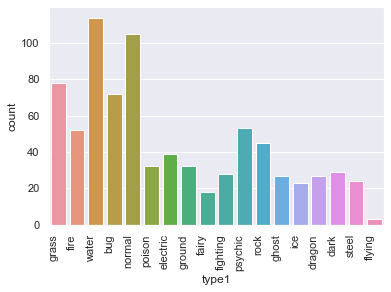

<Figure size 3600x1656 with 0 Axes>

In [18]:
sns.set(style="darkgrid")
ax = sns.countplot(x="type1", data=pokedata)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha="right")
plt.figure(figsize=(50, 23))
plt.tight_layout()
plt.show()

##### As we can see, the greater number of pokemon types are the water types, which is followed by normal, grass and bug respectively.

Now that we know the distribution of the types of pokemon for each of the types. Let's delve into how many types of pokemon of each type exist. Keep in mind that, unless specified, type would also imply that we're talking about the type1 of a pokemon.

<AxesSubplot:>

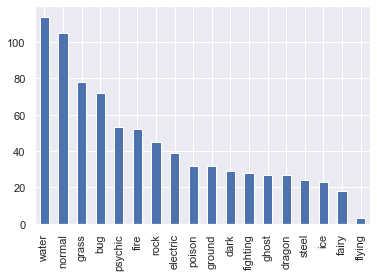

In [19]:
pd.value_counts(pokedata['type1']).plot.bar()

We can see below the counts of each type of pokemon for each of the 7 generations. We're able to clearly see the counts on the heatmap. It's helpful when the list is annotated.

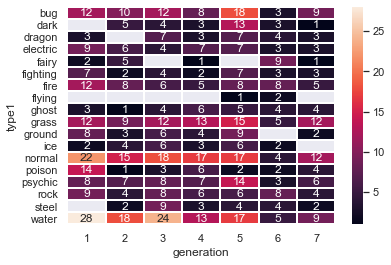

In [20]:
sns.heatmap(
    pokedata.groupby(['type1', 'generation']).size().unstack(),
    linewidths=1,
    annot=True
);

### Ordering the pokemon by attack

In [21]:
df1 = pokestats.sort_values(['attack','sp_attack'],ascending=False).groupby('attack')
df1 = df1.apply(pd.DataFrame)

attack_ordered_pokemon = pd.merge(df1, pokedata, on='id').head(50)

attack_ordered_pokemon.head(10)


id   hp  attack  defense  sp_attack  sp_defense  speed  height_m  \
0  214   80     185      115         40         105     75       1.5   
1  798   59     181      131         59          31    109       0.3   
2  384  105     180      100        180         100    115       7.0   
3  383  100     180      160        150          90     90       3.5   
4  445  108     170      115        120          95     92       1.9   
5  354   64     165       75         93          83     75       1.1   
6  409   97     165       60         65          50     58       1.6   
7  475   68     165       95         65         115    110       1.6   
8  248  100     164      150         95         120     71       2.0   
9  720   80     160       60        170         130     80       NaN   

   weight_kg  against_all  base_total       name    type1     type2  \
0       54.0        21.50         600  Heracross      bug  fighting   
1        0.1        16.25         570    Kartana    grass     steel   
2      206.5        20.25         780   Rayquaza   dragon    flying   
3      950.0        19.00         770    Groudon   ground      None   
4       95.0        20.50         700   Garchomp   dragon    ground   
5       12.5        17.00         555    Banette    ghost      None   
6      102.5        21.00         495  Rampardos     rock      None   
7       52.0        20.00         618    Gallade  psychic  fighting   
8      202.0        23.00         700  Tyranitar     rock      dark   
9        NaN        21.00         680      Hoopa  psychic     ghost   

   generation  is_legendary  capture_rate  
0           2             0            45  
1           7             1           255  
2           3             1            45  
3           3             1             3  
4           4             0            45  
5           3             0            45  
6           4             0            45  
7           4             0            45  
8           2             0            45  
9           6             1             3

We can see that when the pokemon is grouped by the attack statistics, which include the special attack statistics - we can see that the top 5 Pokemon that has the highest attack would be Heracross, Kartana, Rayquaza, Groudon, and Garchomp. 

I wondered what the most strongest attack pokemon types would be. So I sampled 200 pokemon by taking the top 200 pokemon with high attack values, and checked to see the type count of the pokemon.

<AxesSubplot:>

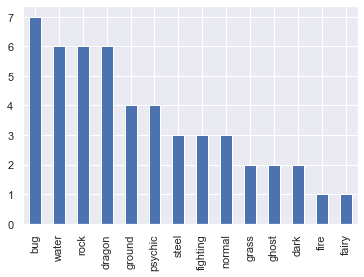

In [22]:
pd.value_counts(attack_ordered_pokemon['type1']).plot.bar()

Here we can see that, the pokemon with the highest attack features are bug types which is followed by water, dragon and rock

### Ordering the pokemon by defense

In [23]:
df1 = pokestats.sort_values(['defense','sp_defense'],ascending=False).groupby('defense')
df1 = df1.apply(pd.DataFrame)

defense_ordered_pokemon = pd.merge(df1, pokedata, on='id').head(50)

defense_ordered_pokemon.head(10)



id   hp  attack  defense  sp_attack  sp_defense  speed  height_m  \
0  213   20      10      230         10         230      5       0.6   
1  208   75     125      230         55          95     30       9.2   
2  306   70     140      230         60          80     50       2.1   
3  377   80     100      200         50         100     50       1.7   
4  713   95     117      184         44          46     28       2.0   
5   80   95      75      180        130          80     30       1.6   
6   91   50      95      180         85          45     70       1.5   
7  411   60      52      168         47         138     30       1.3   
8  383  100     180      160        150          90     90       3.5   
9   95   35      45      160         30          45     70       8.8   

   weight_kg  against_all  base_total       name   type1    type2  generation  \
0       20.5        20.00         505    Shuckle     bug     rock           2   
1      400.0        15.75         610    Steelix   steel   ground           2   
2      360.0        19.50         630     Aggron   steel     rock           3   
3      230.0        21.00         580   Regirock    rock     None           3   
4      505.0        21.50         514    Avalugg     ice     None           6   
5       78.5        20.00         590    Slowbro   water  psychic           1   
6      132.5        20.75         525   Cloyster   water      ice           1   
7      149.5        19.50         495  Bastiodon    rock    steel           4   
8      950.0        19.00         770    Groudon  ground     None           3   
9      210.0        24.25         385       Onix    rock   ground           1   

   is_legendary  capture_rate  
0             0           190  
1             0            25  
2             0            45  
3             1             3  
4             0            55  
5             0            75  
6             0            60  
7             0            45  
8             1             3  
9             0            45

We can see that when the pokemon is grouped by the defense statistics, which include the special defense statistics - we can see that the top 5 Pokemon that has the highest defense would be Shuckle, Steelix, Aggron, Regirock, Avalugg.

I wondered what the most strongest defense pokemon types would be. So I sampled 200 pokemon by taking the top 200 pokemon with high defense values, and checked to see the type count of the pokemon.

<AxesSubplot:>

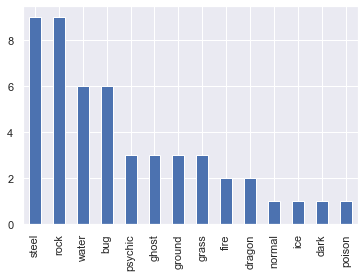

In [24]:
pd.value_counts(defense_ordered_pokemon['type1']).plot.bar()

Here we can see that, the pokemon with the highest attack features are rock and steel. This is pretty obvious seeing as to how thick shells, and rough skin can be good defense against any type.

### Ordering Pokemon by capture rate. 

It's been quite a while since I've played the games, and something that I've wanted to do was to figure out how capture_rate plays an important role in starting off and slowly building your team towards a strong dream team. You tend to capture pokemon early and work with them throughout the game. So a list of pokemon that could be on the team from the start could be the ones with higher capture rates.

In [25]:
pokedata = pokedex[['id', 'name', 'type1', 'type2', 'generation', 'is_legendary', 'capture_rate']]
pokedata['capture_rate'].astype('str').astype('int')
pokedata.sort_values(['is_legendary', 'capture_rate'], ascending=[True, False])

id          name     type1     type2  generation  is_legendary  \
9     10      Caterpie       bug      None           1             0   
12    13        Weedle       bug    poison           1             0   
15    16        Pidgey    normal    flying           1             0   
18    19       Rattata    normal      dark           1             0   
20    21       Spearow    normal    flying           1             0   
22    23         Ekans    poison      None           1             0   
26    27     Sandshrew    ground       ice           1             0   
40    41         Zubat    poison    flying           1             0   
42    43        Oddish     grass    poison           1             0   
49    50       Diglett    ground    ground           1             0   
51    52        Meowth    normal      dark           1             0   
59    60       Poliwag     water      None           1             0   
68    69    Bellsprout     grass    poison           1             0   
73    74       Geodude      rock    ground           1             0   
128  129      Magikarp     water      None           1             0   
160  161       Sentret    normal      None           2             0   
162  163      Hoothoot    normal    flying           2             0   
164  165        Ledyba       bug    flying           2             0   
166  167      Spinarak       bug    poison           2             0   
186  187        Hoppip     grass    flying           2             0   
193  194        Wooper     water    ground           2             0   
260  261     Poochyena      dark      None           3             0   
262  263     Zigzagoon    normal      None           3             0   
264  265       Wurmple       bug      None           3             0   
269  270         Lotad     water     grass           3             0   
272  273        Seedot     grass      None           3             0   
284  285     Shroomish     grass      None           3             0   
286  287       Slakoth    normal      None           3             0   
289  290       Nincada       bug    ground           3             0   
298  299      Nosepass      rock      None           3             0   
299  300        Skitty    normal      None           3             0   
321  322         Numel      fire    ground           3             0   
324  325        Spoink   psychic      None           3             0   
326  327        Spinda    normal      None           3             0   
327  328      Trapinch    ground      None           3             0   
332  333        Swablu    normal    flying           3             0   
342  343        Baltoy    ground   psychic           3             0   
348  349        Feebas     water      None           3             0   
362  363        Spheal       ice     water           3             0   
365  366      Clamperl     water      None           3             0   
395  396        Starly    normal    flying           4             0   
398  399        Bidoof    normal      None           4             0   
400  401     Kricketot       bug      None           4             0   
405  406         Budew     grass    poison           4             0   
435  436       Bronzor     steel   psychic           4             0   
437  438        Bonsly      rock      None           4             0   
503  504        Patrat    normal      None           5             0   
504  505       Watchog    normal      None           5             0   
505  506      Lillipup    normal      None           5             0   
508  509      Purrloin      dark      None           5             0   
518  519        Pidove    normal    flying           5             0   
523  524    Roggenrola      rock      None           5             0   
530  531        Audino    normal      None           5             0   
534  535       Tympole     water      None           5             0   
539  540      Sewaddle       bug     grass    

We can see how Caterpies, Pidgeys, Rattatas are the Pokemons with the higher capture rate. This is pretty obvious from the games as well. They are much more common when you tend to wander off into the wild grass.

### Other observations

Another interesting observation to make would be to count the number of legendary Pokemon in the list of Pokemon. Legendary Pokemon are Pokemon that are harder to catch, and if we're going to make the dream team, we should think about having a dream team which is realistic. This involves having Pokemon which aren't hard to catch, and Pokemon which have a good capture rate.

In [26]:
 print(pokedata[pokedata['is_legendary'] > 0].count())

id              70
name            70
type1           70
type2           70
generation      70
is_legendary    70
capture_rate    70
dtype: int64


In the list of 801 Pokemon, we have around 70 legendary Pokemon which shows that they're only 8% of the total number of Pokemons, which proves how rare they might be.

In [27]:
pokedata[pokedata['is_legendary'] > 0].head(3)

id      name     type1   type2  generation  is_legendary  capture_rate
143  144  Articuno       ice  flying           1             1             3
144  145    Zapdos  electric  flying           1             1             3
145  146   Moltres      fire  flying           1             1             3

In [28]:
pokedata[pokedata['is_legendary'] == 0].head(3)

id       name  type1   type2  generation  is_legendary  capture_rate
0   1  Bulbasaur  grass  poison           1             0            45
1   2    Ivysaur  grass  poison           1             0            45
2   3   Venusaur  grass  poison           1             0            45

We can also see how the capture rate for the legendary Pokemon vary from non legendary Pokemon to legendary Pokemon.

#### Correlation of height and weight with base stats (attack, defense, etc)

In [29]:
alt.Chart(pokestats).mark_bar().encode(
    x='attack',
    y='height_m'
)

alt.Chart(...)

In [30]:
alt.Chart(pokestats).mark_bar().encode(
    x='attack',
    y='weight_kg'
)

alt.Chart(...)

In [31]:
alt.Chart(pokestats).mark_bar().encode(
    x='defense',
    y='weight_kg'
)

alt.Chart(...)

In [32]:
alt.Chart(pokestats).mark_bar().encode(
    x='defense',
    y='height_m'
)

alt.Chart(...)

### Let's get down to some very interesting results!

In [33]:
Image(url='https://media1.tenor.com/images/6808aa5544b6867b20a689660b2e80e2/tenor.gif')

We're going to see if we can find out the strongest type of pokemon! How exciting!

We need to first figure out the most common types of Pokemon types, and this involves delving into the duality of Pokemon types - this would mean that the Pokemon could be of two types. 

/usr/local/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


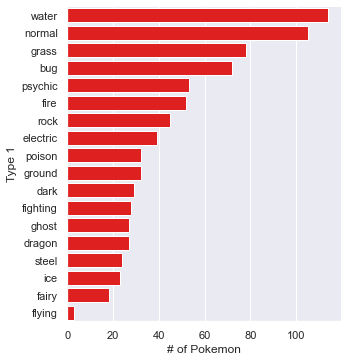

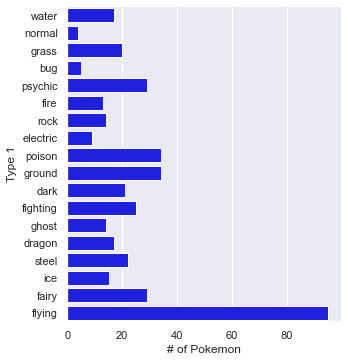

In [34]:
sns.factorplot(
    y='type1',
    data=pokedata,
    kind='count',
    order=pokedata['type1'].value_counts().index,
    color='red'
).set_axis_labels('# of Pokemon', 'Type 1')


sns.factorplot(
    y='type2',
    data=pokedata,
    kind='count',
    order=pokedata['type1'].value_counts().index,
    color='blue'
).set_axis_labels('# of Pokemon', 'Type 1')



We can see the distribution of each types seperately. However, what we need is to find out the intersection count to find out what the most common dual type Pokemon is.

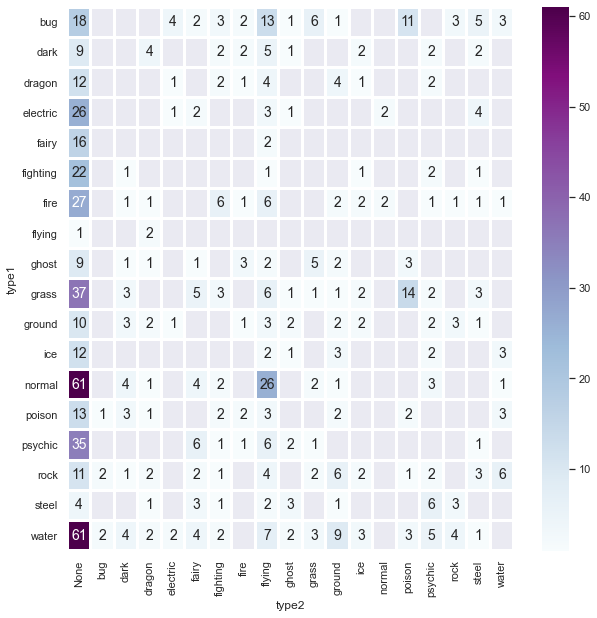

In [35]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(
    pokedata.groupby(['type1', 'type2']).size().unstack(),
    linewidths=2,
    annot=True,
    annot_kws={'size': 14},
    cmap="BuPu"
);

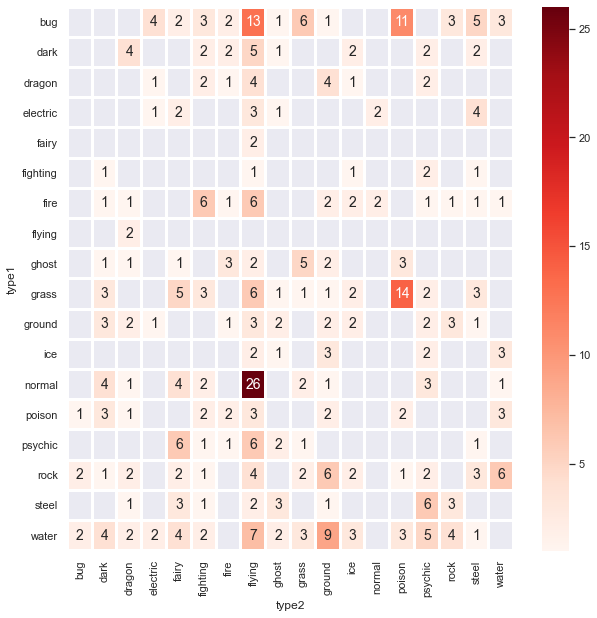

In [36]:
dualtype = pokedata[pokedata['type2'] != 'None']
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(dualtype.groupby(['type1', 'type2']).size().unstack(),linewidths=2,annot=True,annot_kws={'size': 14},
    cmap="Reds");

So the two heatmaps above are different in a way that the former heatmap does not omit single type Pokemon. Due to this reason, the top 5 common Pokemon types are:

1. Normal/None 
2. Water/None
3. Grass/None
4. Psychic/None
5. Grass/None

When we start to include only dual type Pokemon however, we start to see some interesting observations. The latter heatmap shows us these results.

1. Normal/Flying 
2. Grass/Poison
3. Bug/Flying
4. Bug/Poison
5. Water/Ground

We already have an attribute which would be a good general indicator of strong pokemon, this would be the base_total. This would be the sum of the HP, attack, defense, speed, special attack and special defense values. We could also add the against_all to create a new field to see if the attacks against other types plays a role in determining the strong pokemon.

In [37]:
pokestats['grand_total'] = pokestats['base_total'] + pokestats['against_all']

powerful_pokemon = pd.merge(pokedata, pokestats, on='id').sort_values('grand_total', ascending=False)
powerful_pokemon.head(10)

id       name    type1    type2  generation  is_legendary  capture_rate  \
383  384   Rayquaza   dragon   flying           3             1            45   
149  150     Mewtwo  psychic     None           1             1             3   
382  383    Groudon   ground     None           3             1             3   
381  382     Kyogre    water     None           3             1             3   
492  493     Arceus   normal     None           4             1             3   
717  718    Zygarde   dragon   ground           6             1             3   
247  248  Tyranitar     rock     dark           2             0            45   
645  646     Kyurem   dragon      ice           5             1             3   
380  381     Latios   dragon  psychic           3             1             3   
379  380     Latias   dragon  psychic           3             1             3   

      hp  attack  defense  sp_attack  sp_defense  speed  height_m  weight_kg  \
383  105     180      100        180         100    115       7.0      206.5   
149  106     150       70        194         120    140       2.0      122.0   
382  100     180      160        150          90     90       3.5      950.0   
381  100     150       90        180         160     90       4.5      352.0   
492  120     120      120        120         120    120       3.2      320.0   
717  216     100      121         91          95     85       5.0      284.6   
247  100     164      150         95         120     71       2.0      202.0   
645  125     120       90        170         100     95       3.0      325.0   
380   80     130      100        160         120    110       2.0       60.0   
379   80     100      120        140         150    110       1.4       40.0   

     against_all  base_total  grand_total  
383        20.25         780       800.25  
149        20.00         780       800.00  
382        19.00         770       789.00  
381        18.00         770       788.00  
492        18.00         720       738.00  
717        20.50         708       728.50  
247        23.00         700       723.00  
645        21.50         700       721.50  
380        21.00         700       721.00  
379        21.00         700       721.00

We can see the top 10 most seemingly very powerful pokemon out of which only one isn't a legendary Pokemon. Tyranitar which is the most evolved form of Pupitar/Larvitar. We can proceed to take about the first 50 Pokemon which is 6% and check to see what the distribution of types of Pokemon would be.

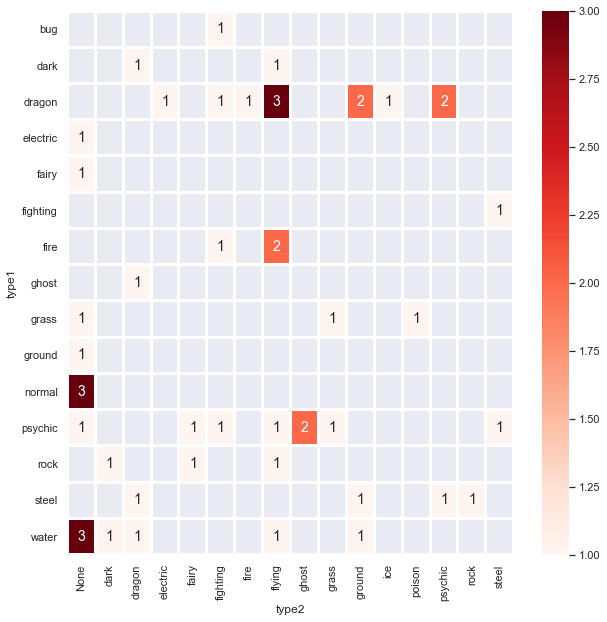

In [38]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(
    powerful_pokemon.head(50).groupby(['type1', 'type2']).size().unstack(),
    linewidths=2,
    annot=True,
    annot_kws={'size': 14},
    cmap="Reds"
);

The most common powerful types of Pokemon would be 

1. Normal/None
2. Water/None
3. Dragon/Flying

But this includes all the legendary Pokemon. Catching legendary Pokemon in the games aren't cake walk, so we would need to exclude these Pokemon and see what the non-legendary types of Pokemon would be, and proceed to narrow down the types of Pokemon for the same.

In [39]:
powerful_non_legendary_pokemon = powerful_pokemon[powerful_pokemon['is_legendary'] == 0]
powerful_non_legendary_pokemon.head(10)

id       name   type1    type2  generation  is_legendary  capture_rate  \
247  248  Tyranitar    rock     dark           2             0            45   
444  445   Garchomp  dragon   ground           4             0            45   
372  373  Salamence  dragon   flying           3             0            45   
375  376  Metagross   steel  psychic           3             0             3   
288  289    Slaking  normal     None           3             0            45   
657  658   Greninja   water     dark           6             0            45   
129  130   Gyarados   water   flying           1             0            45   
259  260   Swampert   water   ground           3             0            45   
5      6  Charizard    fire   flying           1             0            45   
253  254   Sceptile   grass     None           3             0            45   

      hp  attack  defense  sp_attack  sp_defense  speed  height_m  weight_kg  \
247  100     164      150         95         120     71       2.0      202.0   
444  108     170      115        120          95     92       1.9       95.0   
372   95     145      130        120          90    120       1.5      102.6   
375   80     145      150        105         110    110       1.6      550.0   
288  150     160      100         95          65    100       2.0      130.5   
657   72     145       67        153          71    132       1.5       40.0   
129   95     155      109         70         130     81       6.5      235.0   
259  100     150      110         95         110     70       1.5       81.9   
5     78     104       78        159         115    100       1.7       90.5   
253   70     110       75        145          85    145       1.7       52.2   

     against_all  base_total  grand_total  
247        23.00         700       723.00  
444        20.50         700       720.50  
372        20.25         700       720.25  
375        16.25         700       716.25  
288        18.00         670       688.00  
657        19.00         640       659.00  
129        18.50         640       658.50  
259        18.00         635       653.00  
5          18.50         634       652.50  
253        21.00         630       651.00

Great. This looks like a promising result. 



Moving forward, we have another parameter to consider which was mentioned earlier - which was the capture_rate. Let's sort the powerful non legendary pokemon by capture rate and grand total of stats.

In [40]:
capture_ordered_nl_pokemon = powerful_non_legendary_pokemon.sort_values(['capture_rate','grand_total'],ascending=False).groupby('capture_rate')
capture_ordered_nl_pokemon = capture_ordered_nl_pokemon.apply(pd.DataFrame)

capture_ordered_nl_pokemon.head(10)

id      name    type1   type2  generation  is_legendary  capture_rate  \
530  531    Audino   normal    None           5             0           255   
555  556  Maractus    grass    None           5             0           255   
504  505   Watchog   normal    None           5             0           255   
298  299  Nosepass     rock    None           3             0           255   
326  327    Spinda   normal    None           3             0           255   
365  366  Clamperl    water    None           3             0           255   
604  605    Elgyem  psychic    None           5             0           255   
324  325    Spoink  psychic    None           3             0           255   
42    43    Oddish    grass  poison           1             0           255   
539  540  Sewaddle      bug   grass           5             0           255   

      hp  attack  defense  sp_attack  sp_defense  speed  height_m  weight_kg  \
530  103      60      126         80         126     50       1.1       31.0   
555   75      86       67        106          67     60       1.0       28.0   
504   60      85       69         60          69     77       1.1       27.0   
298   30      45      135         45          90     30       1.0       97.0   
326   60      60       60         60          60     60       1.1        5.0   
365   35      64       85         74          55     32       0.4       52.5   
604   55      55       55         85          55     30       0.5        9.0   
324   60      25       35         70          80     60       0.7       30.6   
42    45      50       55         75          65     30       0.5        5.4   
539   45      53       70         40          60     42       0.3        2.5   

     against_all  base_total  grand_total  
530        18.00         545       563.00  
555        21.00         461       482.00  
504        18.00         420       438.00  
298        21.00         375       396.00  
326        18.00         360       378.00  
365        18.00         345       363.00  
604        20.00         335       355.00  
324        20.00         330       350.00  
42         19.25         320       339.25  
539        25.00         310       335.00

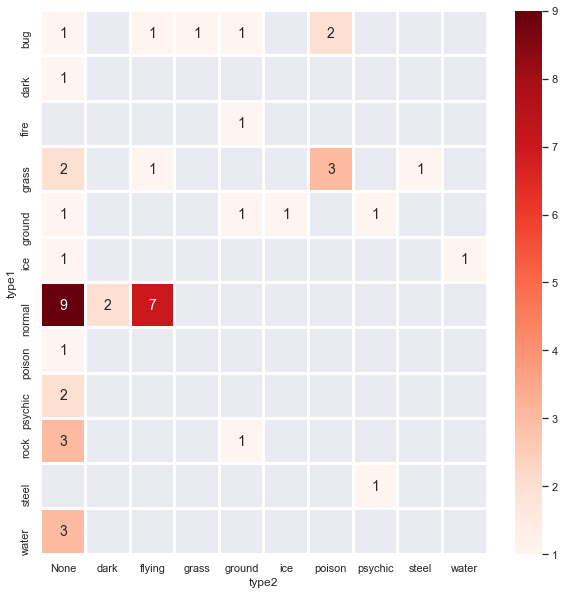

In [41]:
fig, ax = plt.subplots(figsize=(10,10)) 
sns.heatmap(capture_ordered_nl_pokemon.head(50).groupby(['type1', 'type2']).size().unstack(),linewidths=2,annot=True,
    annot_kws={'size': 14},cmap="Reds");

The common types of powerful pokemon are water, normal and ice types.

Therefore, when we consider a dream team, we could go with two approaches - 

1. The first approach would be to choose Pokemon based on the capture rate, and form a team from the availability of the Pokemon.

2. The second approach would be to choose Pokemon based on sheer strength, with their base stats total.

The following could be the 2 variations of the dream team of 6 Pokémon

In [42]:
capture_ordered_nl_pokemon = powerful_non_legendary_pokemon.sort_values(['capture_rate','grand_total'],ascending=False).groupby('grand_total')
capture_ordered_nl_pokemon = capture_ordered_nl_pokemon.apply(pd.DataFrame)

capture_ordered_nl_pokemon.head(6)['name']

530      Audino
555    Maractus
504     Watchog
298    Nosepass
326      Spinda
365    Clamperl
Name: name, dtype: object

In [43]:
capture_ordered_nl_pokemon = powerful_non_legendary_pokemon.sort_values(['grand_total','capture_rate'],ascending=False).groupby('grand_total')
capture_ordered_nl_pokemon = capture_ordered_nl_pokemon.apply(pd.DataFrame)

capture_ordered_nl_pokemon.head(6)['name']

247    Tyranitar
444     Garchomp
372    Salamence
375    Metagross
288      Slaking
657     Greninja
Name: name, dtype: object

The above teams looks pretty balanced to succeed in any of the Nintendo Pokemon games released, and they would be fairly easy to capture in the games.

## Building a legendary Pokémon classifier

Let's try to see the distribution of legendary pokemon in the dataset. From the games, they are pretty rare Pokémon.

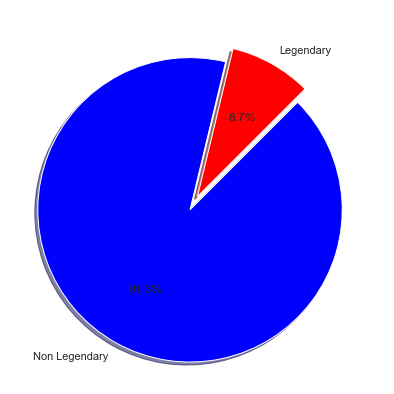

In [44]:
fig = plt.figure(figsize=(7,7))

legendary = pokedata[pokedata['is_legendary'] == True]
non_legendary = pokedata[pokedata['is_legendary'] == False]

legendary_distr = [legendary['name'].count(), non_legendary['name'].count()]
legendary_pie = plt.pie(legendary_distr, labels= ['Legendary', 'Non Legendary'],autopct ='%1.1f%%', shadow = True,
                 colors = ["red", "blue"], startangle = 45, explode=(0, 0.1))

As we can see, Legendary Pokémon  are rare. This proves to be a problem since there isn't enough data to exploit, which would mean that we would need to analyze whether there would be correlations between stats, gender, capture_rate or other attributes to determine whether a pokemon is legendary.

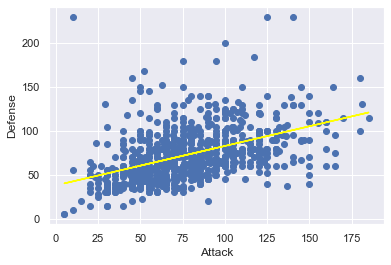

In [45]:
# We're going to see if there is a correlation between attack, defense stats to determine whether the Pokemon is legendary.

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



X = pokestats[['attack']]
Y = pokestats[['defense']]

model = LinearRegression()
model.fit(X, Y)

Y_pred = model.predict(X)

plt.scatter(X, Y)
plt.plot(X, Y_pred, color = 'yellow')
plt.xlabel('Attack')
plt.ylabel('Defense')
plt.show()

<AxesSubplot:xlabel='is_legendary', ylabel='attack'>

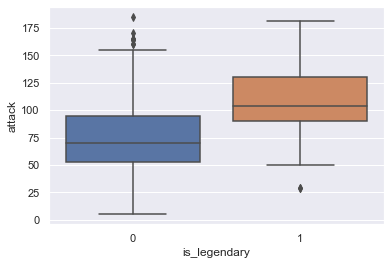

In [46]:
sns.boxplot(x=pokedex['is_legendary'], y=pokedex['attack'])

<AxesSubplot:xlabel='is_legendary', ylabel='defense'>

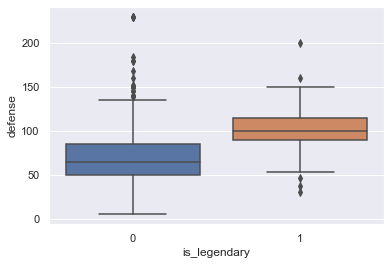

In [47]:
sns.boxplot(x=pokedex['is_legendary'], y=pokedex['defense'])

In [48]:
isLegendary = pd.get_dummies(pokedex['is_legendary'], drop_first=True)
legendary_poke = pokedex[['base_total', 'capture_rate']]
legendary_poke = pd.concat([legendary_poke, isLegendary], axis=1)
legendary_poke.columns = ['base_total', 'capture_rate', 'is_legendary']
legendary_poke.head(10)

base_total  capture_rate  is_legendary
0         318            45             0
1         405            45             0
2         625            45             0
3         309            45             0
4         405            45             0
5         634            45             0
6         314            45             0
7         405            45             0
8         630            45             0
9         195           255             0

In [49]:
## Creating labels for legendary and non legendary pokemon

X_leg = legendary_poke.drop('is_legendary', axis = 1)
Y_leg = legendary_poke['is_legendary']

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn import tree
from sklearn.model_selection import cross_val_score, KFold

X_leg_train, X_leg_test, Y_leg_train, Y_leg_test = train_test_split(X_leg, Y_leg, test_size=0.3) 


#Fitting the model to the training data.
LR = LogisticRegression()
LR.fit(X_leg_train, Y_leg_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [51]:
pred = LR.predict(X_leg_test)
print(classification_report(Y_leg_test, pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       218
           1       0.90      0.78      0.84        23

    accuracy                           0.97       241
   macro avg       0.94      0.89      0.91       241
weighted avg       0.97      0.97      0.97       241



We can see how the following classification plays out with decision trees.

In [52]:
kfold = KFold(n_splits=500, random_state=10)

clf = tree.DecisionTreeClassifier().fit(X_leg,Y_leg)

result = cross_val_score(clf, X_leg,Y_leg, cv=kfold, scoring='accuracy')

print(result.mean())

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


0.987


We can see that a decision tree classifier plays out better in determining whether a pokemon is legendary with the attributes of base stats and capture rate. 

To conclude this project, we've done a remarkable job in analyzing this dataset.

1. We've figured out what a dream team could look like?
2. What kinds of pokemon are the strongest?
3. Whether we can tell if a pokemon is legendary or not?

This project has been really helpful in terms of understanding how different visualizations, algorithms can be really helpful in deducing and analyzing data.

In [53]:
Image(url='https://media1.tenor.com/images/36391cec14724d3ea5486c5d0b5e2b80/tenor.gif')


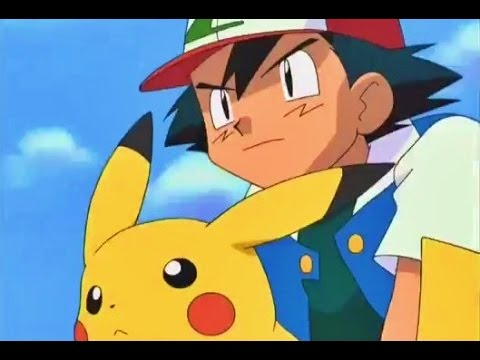

In [54]:
YouTubeVideo('rg6CiPI6h2g')

# The End! 